In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

C:\Users\JCIN\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('../dataset/cleaned_bankruptcy_data.csv')

In [4]:
df

,company_name,Financial_Year,Bankruptcy_Status,Current_Assets,Cost_of_Goods_Sold,Depreciation_Amortization,EBITDA,Inventory,Net_Income,Total_Receivables,...,Total_Long_Term_Debt,EBIT,Gross_Profit,Total_Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Total_Operating_Expenses,Division,Major_Group
0,C_1,1999.0,0,511267.0,740998.000,833107.0,180447.000,18373.000,70658.000,89031.000,...,35.163,201026.000,128.348,1024333.000,372.7519,401483.000,1024333.000,935302.00,D,37
1,C_1,2000.0,0,485856.0,701.854,713811.0,179987.000,18577.000,45.790,64367.000,...,18531.000,204065.000,115187.000,874255.000,377.1180,361642.000,874255.000,809888.00,D,37
2,C_1,2001.0,0,436656.0,710199.000,526477.0,217699.000,22496.000,4711.000,27207.000,...,-58.939,139.603,77528.000,638721.000,364.5928,399964.000,638721.000,611514.00,D,37
3,C_1,2002.0,0,396412.0,686.621,496747.0,164658.000,27172.000,3573.000,30745.000,...,-12.410,124106.000,66322.000,606337.000,143.3295,391633.000,606337.000,575592.00,D,37
4,C_1,2003.0,0,432204.0,709.292,523302.0,248666.000,26.680,20811.000,47.491,...,3504.000,131884.000,104661.000,651.958,308.9071,407608.000,651.958,604467.00,D,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62784,C_8971,2014.0,0,233211.0,1099101.000,43338.0,184666.000,14094.000,31521.000,45615.000,...,25261.000,28095.000,22846.000,104223.000,756.4827,225887.000,104223.000,58608.00,E,44
62785,C_8971,2015.0,0,105559.0,1865926.000,59184.0,770.103,42592.000,159541.000,202133.000,...,129688.000,157783.000,54611.000,291153.000,527575.0000,880327.000,291153.000,89.02,E,44
62786,C_8971,2016.0,0,63971.0,1746235.000,69074.0,683985.000,65057.000,13.994,79051.000,...,-1442.000,156341.000,42467.000,169858.000,578.8868,770.233,169858.000,90807.00,E,44
62787,C_8971,2017.0,0,135207.0,1736.110,66527.0,694035.000,65.330,3841.000,69171.000,...,-20401.000,135941.000,27217.000,161884.000,412.6241,776697.000,161884.000,92713.00,E,44


In [5]:
df.nunique()

company_name                  7176
Financial_Year                  20
Bankruptcy_Status                2
Current_Assets               52311
Cost_of_Goods_Sold           56953
Depreciation_Amortization    52070
EBITDA                       31011
Inventory                    29333
Net_Income                   45931
Total_Receivables            47415
Market_Value                 51614
Net_Sales                    31140
Total_Assets                 46792
Total_Long_Term_Debt         44918
EBIT                         57654
Gross_Profit                 39751
Total_Current_Liabilities    54556
Retained_Earnings            62033
Total_Revenue                51602
Total_Liabilities            54556
Total_Operating_Expenses     56291
Division                        10
Major_Group                     73
dtype: int64

In [6]:
df['Bankruptcy_Status'].value_counts()

Bankruptcy_Status
0    58586
1     4203
Name: count, dtype: int64

C:\Users\JCIN\AppData\Local\Temp\ipykernel_31100\1787865835.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


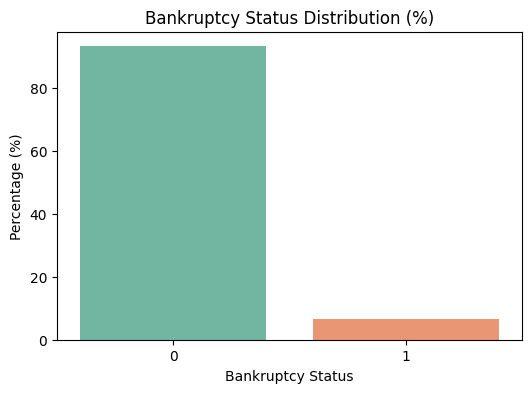

✅ Chart saved successfully at: ../result_images\bankruptcy_status_distribution.png


In [7]:
status_counts = df['Bankruptcy_Status'].value_counts(normalize=True).reset_index()
status_counts.columns = ['Bankruptcy_Status', 'Percentage']
status_counts['Percentage'] *= 100

# Ensure the folder exists
output_folder = '../result_images'
os.makedirs(output_folder, exist_ok=True)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=status_counts,
    x='Bankruptcy_Status',
    y='Percentage',
    palette='Set2'
)
plt.title('Bankruptcy Status Distribution (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Bankruptcy Status')

# Save the image
output_path = os.path.join(output_folder, 'bankruptcy_status_distribution.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"✅ Chart saved successfully at: {output_path}")

In [8]:
status_counts

,Bankruptcy_Status,Percentage
0,0,93.306152
1,1,6.693848


### There is a heavy class imbalance in the target variable.

In [9]:
df['Financial_Year'].value_counts()

Financial_Year
1999.0    4273
2000.0    4197
2001.0    3932
2002.0    3734
2003.0    3537
2004.0    3485
2005.0    3357
2006.0    3318
2007.0    3219
2008.0    3084
2009.0    2985
2010.0    2885
2011.0    2802
2014.0    2773
2013.0    2764
2012.0    2757
2015.0    2657
2016.0    2500
2017.0    2377
2018.0    2153
Name: count, dtype: int64

C:\Users\JCIN\AppData\Local\Temp\ipykernel_31100\1351099842.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


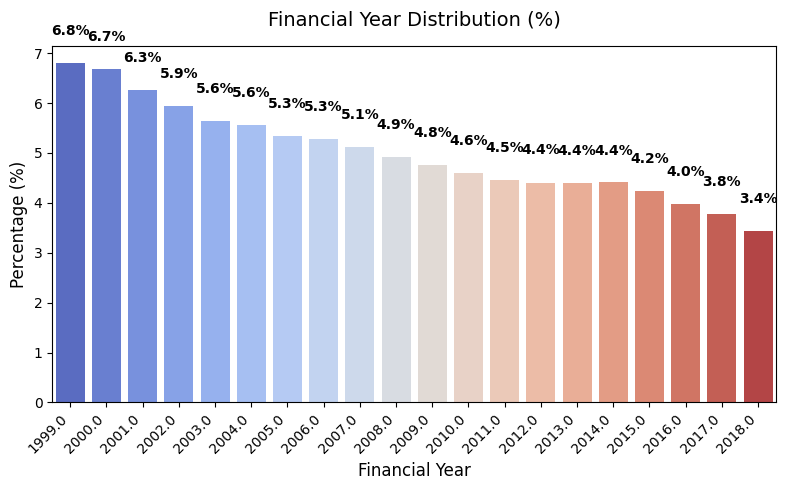

✅ Plot saved successfully at: ../result_images\financial_year_distribution.png


In [10]:
# Calculate percentage distribution
year_counts = df['Financial_Year'].value_counts(normalize=True).reset_index()
year_counts.columns = ['Financial_Year', 'Percentage']
year_counts['Percentage'] *= 100

# Ensure the output folder exists
output_folder = '../result_images'
os.makedirs(output_folder, exist_ok=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=year_counts,
    x='Financial_Year',
    y='Percentage',
    palette='coolwarm'
)

# Titles and labels
plt.title('Financial Year Distribution (%)', fontsize=14, pad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Financial Year', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add percentage labels above bars, with spacing adjustment
for index, row in year_counts.iterrows():
    plt.text(
        index, 
        row['Percentage'] + 0.5, 
        f"{row['Percentage']:.1f}%", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='semibold'
    )

# Improve layout to prevent clipping
plt.tight_layout()

# Save the plot
output_path = os.path.join(output_folder, 'financial_year_distribution.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"✅ Plot saved successfully at: {output_path}")

In [11]:
year_counts

,Financial_Year,Percentage
0,1999.0,6.805332
1,2000.0,6.684292
2,2001.0,6.262243
3,2002.0,5.946902
4,2003.0,5.633152
5,2004.0,5.550335
6,2005.0,5.346478
7,2006.0,5.284365
8,2007.0,5.126694
9,2008.0,4.911688


In [12]:

summary = df.groupby(['Financial_Year', 'Bankruptcy_Status']).size().unstack(fill_value=0)

summary.columns = ['Not_Bankrupt (0)', 'Bankrupt (1)']

summary = summary.sort_index()

summary


,Not_Bankrupt (0),Bankrupt (1)
Financial_Year,,
1999.0,3965,308
2000.0,3871,326
2001.0,3600,332
2002.0,3403,331
2003.0,3206,331
2004.0,3161,324
2005.0,3051,306
2006.0,3021,297
2007.0,2944,275


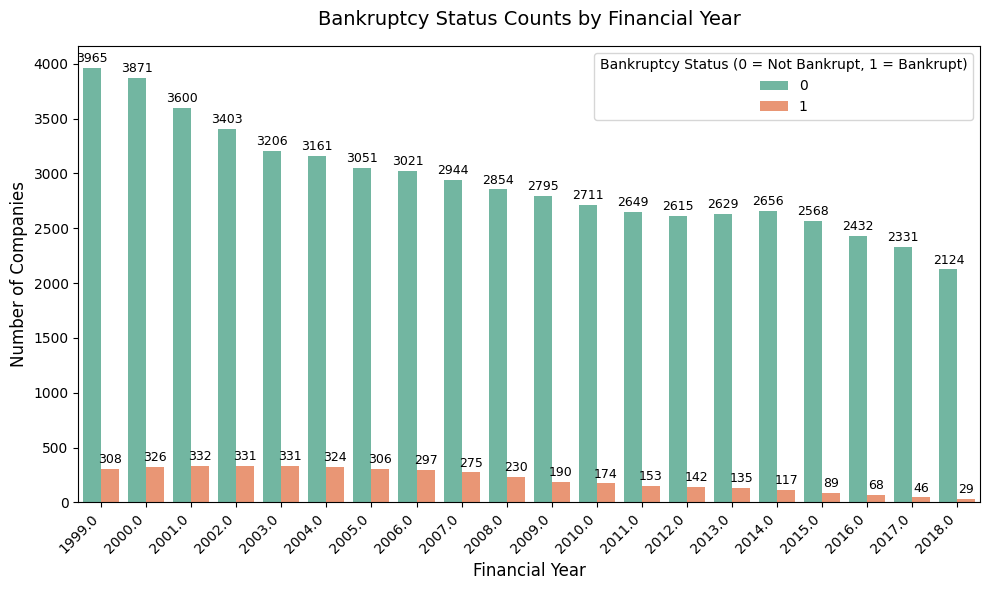

✅ Chart saved successfully at: ../result_images\bankruptcy_status_by_year_counts.png


In [13]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data again (flat format for seaborn)
plot_data = df.groupby(['Financial_Year', 'Bankruptcy_Status']).size().reset_index(name='Count')

# Ensure output folder exists
output_folder = '../result_images'
os.makedirs(output_folder, exist_ok=True)

# Plot grouped bars
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_data,
    x='Financial_Year',
    y='Count',
    hue='Bankruptcy_Status',
    palette='Set2'
)

plt.title('Bankruptcy Status Counts by Financial Year', fontsize=14, pad=15)
plt.xlabel('Financial Year', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bankruptcy Status (0 = Not Bankrupt, 1 = Bankrupt)')

# Add counts on top of each bar
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

plt.tight_layout()

# Save plot
output_path = os.path.join(output_folder, 'bankruptcy_status_by_year_counts.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Chart saved successfully at: {output_path}")


### There is no need of converting Financial Year into a categorical variable since it is already being treated correctly in the plots.
#### Almost homogeneous distribution across years.
#### No significant trends or patterns observed in terms of distribution of bankruptcy status over the years.

In [14]:
df['Division'].value_counts()

Division
D    30861
I    13649
E     5695
G     4411
B     3377
F     2273
H     1680
C      559
A      277
J        7
Name: count, dtype: int64

C:\Users\JCIN\AppData\Local\Temp\ipykernel_31100\2336014714.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


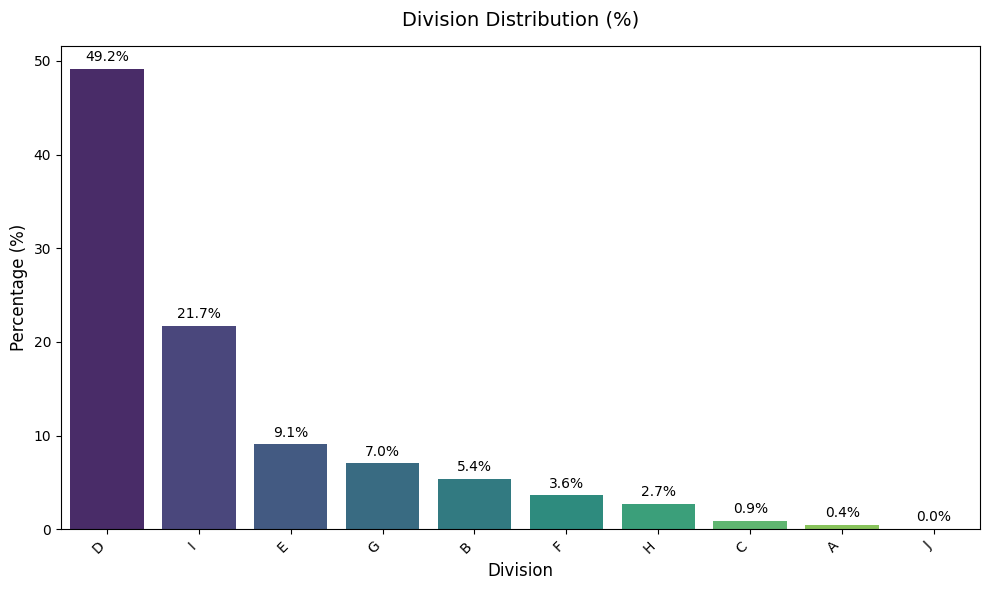

✅ Chart saved successfully at: ../result_images\division_distribution_percentage.png


In [15]:
# Calculate percentage distribution
division_counts = df['Division'].value_counts(normalize=True).reset_index()
division_counts.columns = ['Division', 'Percentage']
division_counts['Percentage'] *= 100

# Ensure output folder exists
output_folder = '../result_images'
os.makedirs(output_folder, exist_ok=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=division_counts,
    x='Division',
    y='Percentage',
    palette='viridis'
)

# Add labels and title
plt.title('Division Distribution (%)', fontsize=14, pad=15)
plt.xlabel('Division', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add percentage labels above each bar
for i, value in enumerate(division_counts['Percentage']):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()

# Save the image
output_path = os.path.join(output_folder, 'division_distribution_percentage.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"✅ Chart saved successfully at: {output_path}")


In [16]:
division_counts

,Division,Percentage
0,D,49.150329
1,I,21.737884
2,E,9.070060
3,G,7.025116
4,B,5.378331
5,F,3.620061
6,H,2.675628
7,C,0.890283
8,A,0.441160
9,J,0.011148


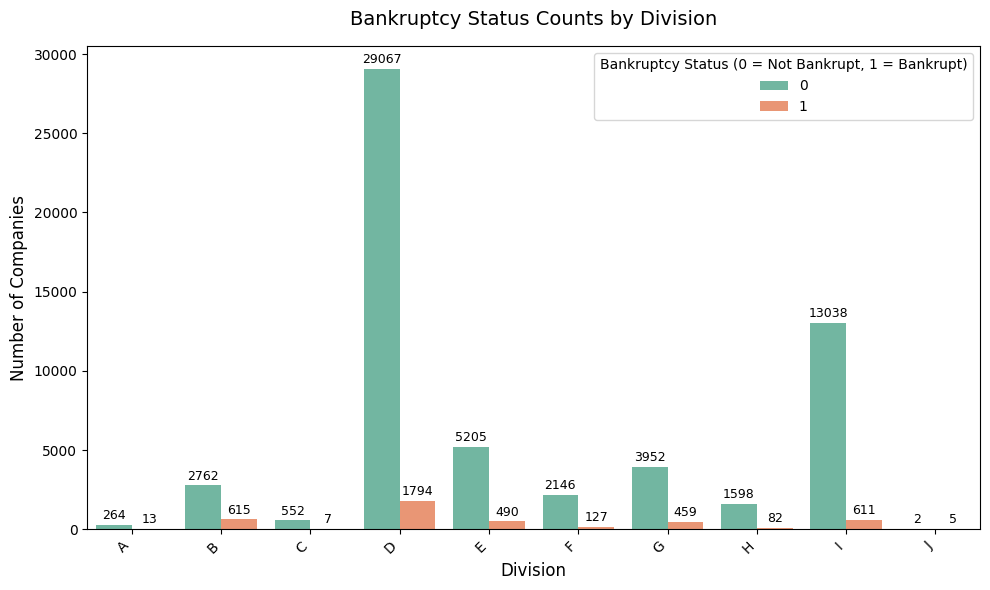

✅ Chart saved successfully at: ../result_images\bankruptcy_status_by_division_counts.png


In [17]:
plot_data = df.groupby(['Division', 'Bankruptcy_Status']).size().reset_index(name='Count')

# Ensure output folder exists
output_folder = '../result_images'
os.makedirs(output_folder, exist_ok=True)

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_data,
    x='Division',
    y='Count',
    hue='Bankruptcy_Status',
    palette='Set2'
)

# Titles and labels
plt.title('Bankruptcy Status Counts by Division', fontsize=14, pad=15)
plt.xlabel('Division', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bankruptcy Status (0 = Not Bankrupt, 1 = Bankrupt)')

# Add count labels on each bar
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

plt.tight_layout()

# Save the plot
output_path = os.path.join(output_folder, 'bankruptcy_status_by_division_counts.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

print(f"✅ Chart saved successfully at: {output_path}")

C:\Users\JCIN\AppData\Local\Temp\ipykernel_31100\1336694388.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


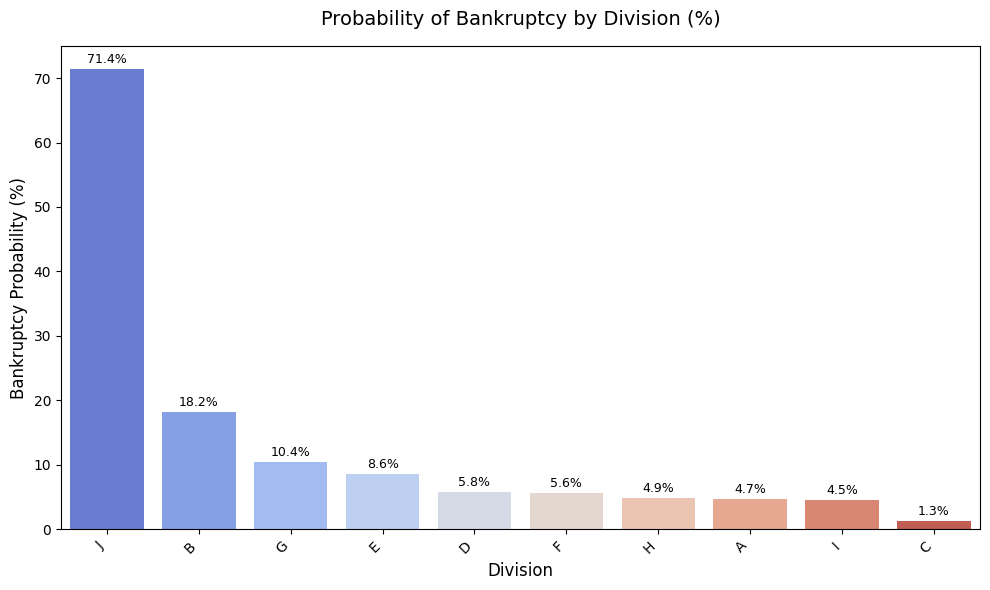

✅ Probability of bankruptcy chart saved successfully at: ../result_images\probability_of_bankruptcy_by_division.png


In [18]:
prob_df = (
    df.groupby('Division')['Bankruptcy_Status']
      .mean()                       # Mean of 0/1 gives probability of 1
      .reset_index(name='Probability')
)

# Convert to percentage
prob_df['Percentage'] = prob_df['Probability'] * 100

# --- 2️⃣ Sort by probability for readability ---
prob_df = prob_df.sort_values('Percentage', ascending=False)

# --- 3️⃣ Ensure output folder exists ---
output_folder = '../result_images'
os.makedirs(output_folder, exist_ok=True)

# --- 4️⃣ Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=prob_df,
    x='Division',
    y='Percentage',
    palette='coolwarm'
)

plt.title('Probability of Bankruptcy by Division (%)', fontsize=14, pad=15)
plt.xlabel('Division', fontsize=12)
plt.ylabel('Bankruptcy Probability (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add percentage labels above bars
for i, value in enumerate(prob_df['Percentage']):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()

# --- 5️⃣ Save the plot ---
output_path = os.path.join(output_folder, 'probability_of_bankruptcy_by_division.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

print(f"✅ Probability of bankruptcy chart saved successfully at: {output_path}")

In [19]:
prob_df

,Division,Probability,Percentage
9,J,0.714286,71.428571
1,B,0.182114,18.211430
6,G,0.104058,10.405804
4,E,0.086040,8.604039
3,D,0.058132,5.813162
5,F,0.055873,5.587330
7,H,0.048810,4.880952
0,A,0.046931,4.693141
8,I,0.044765,4.476518
2,C,0.012522,1.252236


In [20]:
division_counts

,Division,Percentage
0,D,49.150329
1,I,21.737884
2,E,9.070060
3,G,7.025116
4,B,5.378331
5,F,3.620061
6,H,2.675628
7,C,0.890283
8,A,0.441160
9,J,0.011148


## 📊 Division-Wise Bankruptcy Analysis

### 1️⃣ Division-Wise Share of Companies
| Division | % of Total Companies |
|-----------|----------------------|
| D | 49.15% |
| I | 21.74% |
| E | 9.07% |
| G | 7.03% |
| B | 5.38% |
| F | 3.62% |
| H | 2.68% |
| C | 0.89% |
| A | 0.44% |
| J | 0.01% |

**Interpretation:**
- The majority of firms belong to **Division D (49%)** and **Division I (22%)** — these dominate the dataset.  
- **Divisions A, C, and J** are extremely small in number.

---

### 2️⃣ Division-Wise Bankruptcy Probability
| Division | Probability of Bankruptcy | % Relative |
|-----------|----------------------------|-------------|
| J | 0.714 | 71.43% |
| B | 0.182 | 18.21% |
| G | 0.104 | 10.41% |
| E | 0.086 | 8.60% |
| D | 0.058 | 5.81% |
| F | 0.056 | 5.59% |
| H | 0.049 | 4.88% |
| A | 0.047 | 4.69% |
| I | 0.045 | 4.48% |
| C | 0.013 | 1.25% |

**Interpretation:**
- **Division J** has an *exceptionally high bankruptcy probability (71%)*, though it represents only **0.01%** of total firms.  
- **Divisions B (18%)** and **G (10%)** are next most vulnerable.  
- **Divisions I and C** show *very low bankruptcy risk* — likely more stable sectors.  
- **Division D**, despite its size, has only a *moderate risk (5.8%)*.

---

### 3️⃣ Combined Insights
| Key Insight | Implication |
|--------------|-------------|
| **High frequency but moderate risk (D, I)** | These dominate the dataset and stabilize overall bankruptcy exposure. |
| **Low frequency but high risk (J, B)** | Small but volatile divisions — worth close monitoring. |
| **Stable divisions (C, I, A, H)** | Likely robust or well-managed sectors. |
| **Medium-high risk divisions (E, F, G)** | Targeted risk reduction here can significantly lower overall bankruptcy exposure. |

---

### ✅ Summary Conclusions
1. **Most companies (≈70%) are in Divisions D and I**, showing **low-to-moderate bankruptcy risk** — stabilizing the system.  
2. **Division J**, while tiny, is **extremely high-risk** and should be investigated individually.  
3. **Divisions B and G** are **priority targets for risk management**, as they combine noticeable presence with elevated failure probabilities.  
4. **Divisions C, A, and I** appear to be **financially stable sectors**.  
5. **Overall**, the bankruptcy landscape is well-balanced — major divisions have controlled risk, while smaller, riskier sectors can be isolated and monitored.

---


In [21]:
df['Major_Group'].value_counts()

Major_Group
73    8899
28    6650
36    5565
38    5230
35    3732
      ... 
9       16
41       8
46       7
99       7
86       4
Name: count, Length: 73, dtype: int64

C:\Users\JCIN\AppData\Local\Temp\ipykernel_31100\706714458.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


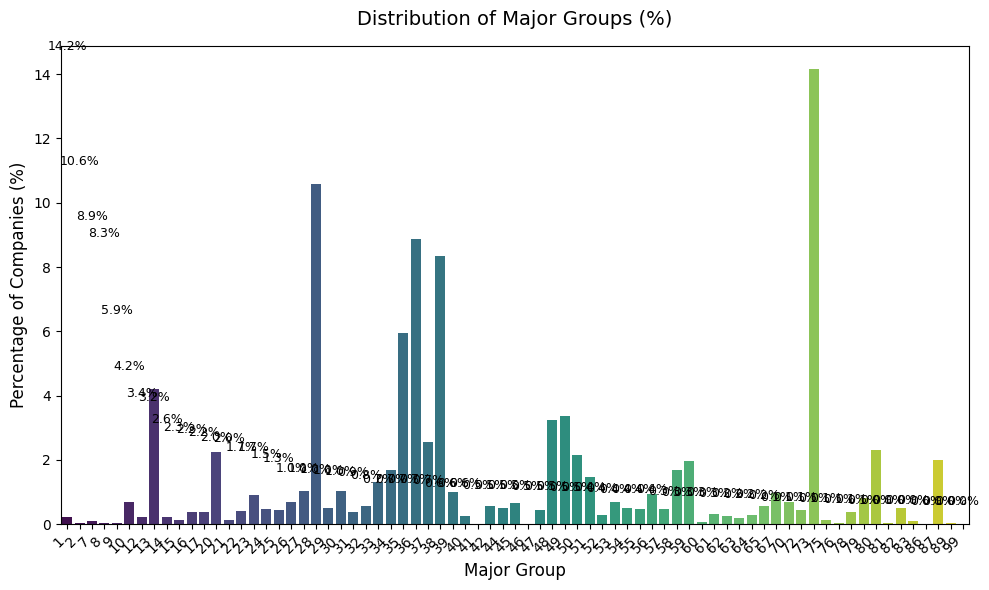

✅ Normal distribution chart saved successfully at: ../result_images\major_group_distribution_percentage.png


In [22]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentage distribution
major_group_dist = df['Major_Group'].value_counts(normalize=True).reset_index()
major_group_dist.columns = ['Major_Group', 'Percentage']
major_group_dist['Percentage'] *= 100

# Ensure output folder exists
output_folder = '../result_images'
os.makedirs(output_folder, exist_ok=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=major_group_dist,
    x='Major_Group',
    y='Percentage',
    palette='viridis'
)

plt.title('Distribution of Major Groups (%)', fontsize=14, pad=15)
plt.xlabel('Major Group', fontsize=12)
plt.ylabel('Percentage of Companies (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add percentage labels above bars
for i, value in enumerate(major_group_dist['Percentage']):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()

# Save plot
output_path = os.path.join(output_folder, 'major_group_distribution_percentage.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

print(f"✅ Normal distribution chart saved successfully at: {output_path}")


C:\Users\JCIN\AppData\Local\Temp\ipykernel_31100\3172993858.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\JCIN\AppData\Local\Temp\ipykernel_31100\3172993858.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_major_groups['Major_Group'], rotation=0, ha='center')


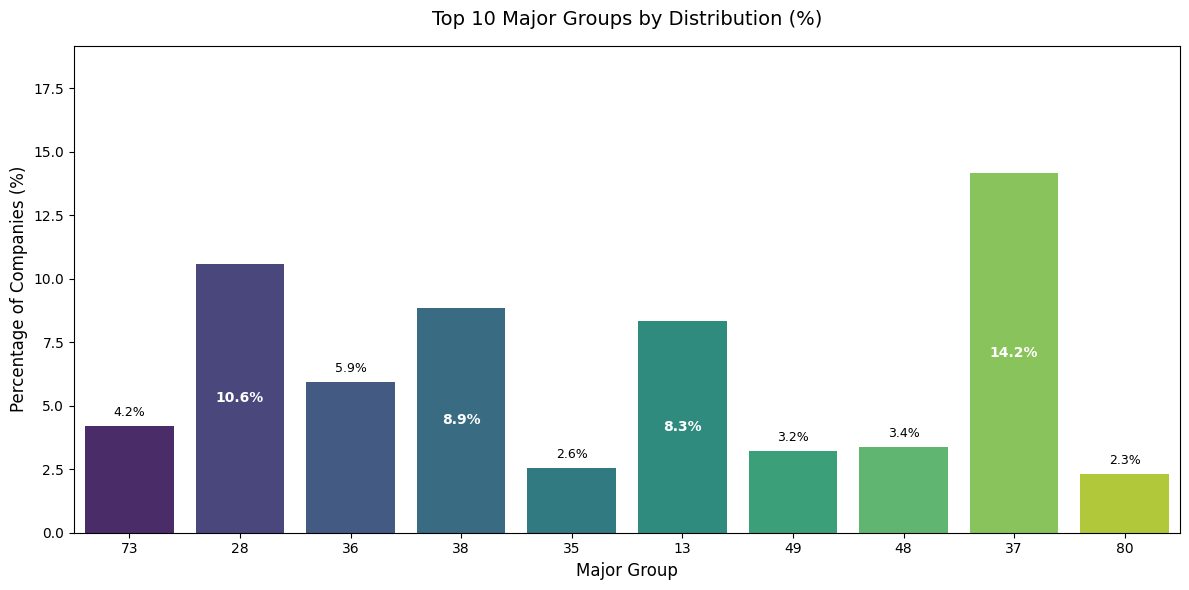

✅ Top 10 major group distribution saved at: ../result_images\top10_major_group_distribution.png


In [23]:
import os
import textwrap
import seaborn as sns
import matplotlib.pyplot as plt

# Data prep (top 10 by distribution)
major_group_dist = df['Major_Group'].value_counts(normalize=True).reset_index()
major_group_dist.columns = ['Major_Group', 'Percentage']
major_group_dist['Percentage'] *= 100
top_major_groups = major_group_dist.head(10)

# Ensure output folder exists
output_folder = '../result_images'
os.makedirs(output_folder, exist_ok=True)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_major_groups,
    x='Major_Group',
    y='Percentage',
    palette='viridis'
)

# Wrap long x-tick labels (max width 20 chars per line)
ax.set_xticklabels(top_major_groups['Major_Group'], rotation=0, ha='center')

plt.title('Top 10 Major Groups by Distribution (%)', fontsize=14, pad=15)
plt.xlabel('Major Group', fontsize=12)
plt.ylabel('Percentage of Companies (%)', fontsize=12)

# Give some headroom so labels above bars aren't clipped
ymax = top_major_groups['Percentage'].max()
ax.set_ylim(0, ymax + max(5, ymax * 0.12))

# Add percentage labels on/above bars with smart placement
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2.0

    label = f'{height:.1f}%'
    # If bar is tall enough, put label inside bar, else above
    if height >= 8:  # threshold in percentage points — tweak if needed
        va = 'center'
        y = height / 2.0
        color = 'white'
        fontsize = 10
        weight = 'semibold'
    else:
        va = 'bottom'
        y = height + (ymax * 0.02)  # small offset above bar
        color = 'black'
        fontsize = 9
        weight = 'normal'

    ax.text(x, y, label, ha='center', va=va, color=color, fontsize=fontsize, fontweight=weight)

plt.tight_layout()

# Save the plot
output_path = os.path.join(output_folder, 'top10_major_group_distribution.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()
print(f"✅ Top 10 major group distribution saved at: {output_path}")


C:\Users\JCIN\AppData\Local\Temp\ipykernel_31100\3613645519.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\JCIN\AppData\Local\Temp\ipykernel_31100\3613645519.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_risky_groups['Major_Group'], rotation=0, ha='center')


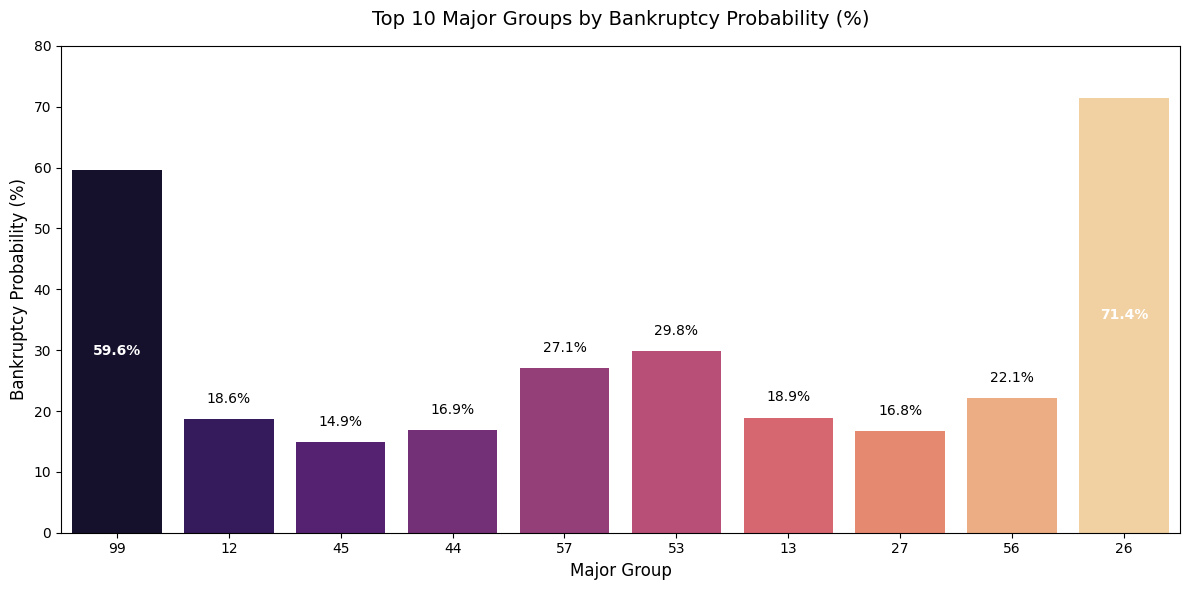

✅ Top 10 bankruptcy probability chart saved at: ../result_images\top10_major_group_bankruptcy_probability.png


In [24]:
import os
import textwrap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- 1️⃣ Compute bankruptcy probability ---
prob_df = (
    df.groupby('Major_Group')['Bankruptcy_Status']
      .mean()
      .reset_index(name='Probability')
)
prob_df['Percentage'] = prob_df['Probability'] * 100

# --- 2️⃣ Top 10 by probability ---
top_risky_groups = prob_df.sort_values('Percentage', ascending=False).head(10)

# --- 3️⃣ Ensure output folder exists ---
output_folder = '../result_images'
os.makedirs(output_folder, exist_ok=True)

# --- 4️⃣ Plot ---
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_risky_groups,
    x='Major_Group',
    y='Percentage',
    palette='magma'
)


ax.set_xticklabels(top_risky_groups['Major_Group'], rotation=0, ha='center')

# --- 6️⃣ Titles and axes ---
plt.title('Top 10 Major Groups by Bankruptcy Probability (%)', fontsize=14, pad=15)
plt.xlabel('Major Group', fontsize=12)
plt.ylabel('Bankruptcy Probability (%)', fontsize=12)

# --- 7️⃣ Adjust Y-limit for label spacing ---
ymax = top_risky_groups['Percentage'].max()
ax.set_ylim(0, ymax + max(5, ymax * 0.12))

# --- 8️⃣ Add dynamic annotations (inside or above bars) ---
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2.0

    label = f'{height:.1f}%'

    # If the bar is tall enough, put label inside; else, place above
    if height >= ymax * 0.5:  # inside if bar > 50% of max
        va = 'center'
        y = height / 2.0
        color = 'white'
        weight = 'semibold'
    else:
        va = 'bottom'
        y = height + (ymax * 0.03)
        color = 'black'
        weight = 'normal'

    ax.text(x, y, label, ha='center', va=va, color=color, fontsize=10, fontweight=weight)

plt.tight_layout()

# --- 9️⃣ Save and show ---
output_path = os.path.join(output_folder, 'top10_major_group_bankruptcy_probability.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()
print(f"✅ Top 10 bankruptcy probability chart saved at: {output_path}")


In [25]:
top_risky_groups

,Major_Group,Probability,Percentage
72,99,0.714286,71.428571
6,12,0.596026,59.602649
36,45,0.298077,29.807692
35,44,0.271028,27.102804
48,57,0.220736,22.073579
44,53,0.189252,18.925234
7,13,0.186082,18.608169
19,27,0.168731,16.873065
47,56,0.167504,16.750419
18,26,0.149083,14.908257


In [26]:
top_major_groups

,Major_Group,Percentage
0,73,14.172865
1,28,10.591027
2,36,8.863017
3,38,8.329484
4,35,5.943716
5,13,4.210929
6,49,3.377980
7,48,3.228272
8,37,2.551402
9,80,2.320470


## 🏭 Major Group-Level Bankruptcy Analysis

### 1️⃣ Top Major Groups by Bankruptcy Probability
| Rank | Major Group | Probability of Bankruptcy | % Relative | Interpretation |
|------|--------------|----------------------------|-------------|----------------|
| 1️⃣ | 99 | 0.714 | 71.43% | 🚨 Extremely high bankruptcy risk — possibly a small, volatile sector. |
| 2️⃣ | 12 | 0.596 | 59.60% | 🔴 Very high risk; should be closely monitored. |
| 3️⃣ | 45 | 0.298 | 29.81% | 🟠 Moderate-to-high risk — significant warning signs. |
| 4️⃣ | 44 | 0.271 | 27.10% | 🟠 Moderate-high risk level. |
| 5️⃣ | 57 | 0.221 | 22.07% | 🟡 Medium risk; notable but not extreme. |
| 6️⃣ | 53 | 0.189 | 18.93% | 🟡 Moderate risk — watch for trends. |
| 7️⃣ | 13 | 0.186 | 18.61% | 🟡 Moderate risk — similar to Group 53. |
| 8️⃣ | 27 | 0.169 | 16.87% | 🟢 Low-medium risk. |
| 9️⃣ | 56 | 0.168 | 16.75% | 🟢 Low-medium risk. |
| 🔟 | 26 | 0.149 | 14.91% | 🟢 Relatively stable compared to higher-risk groups. |

**🧩 Interpretation:**
- **Major Groups 99 and 12** have **extremely high bankruptcy probabilities (60–70%)**, far exceeding others — likely representing small, unstable, or crisis-affected sectors.  
- **Groups 45 and 44** show **notable vulnerability** (27–30%).  
- **Groups 57, 53, and 13** are in the **moderate-risk zone (15–20%)**.  
- **Groups 27, 56, and 26** represent **lower-risk segments** comparatively.

---

### 2️⃣ Top Major Groups by Company Share
| Rank | Major Group | % of Total Companies | Interpretation |
|------|--------------|----------------------|----------------|
| 1️⃣ | 73 | 14.17% | Largest major group — critical to system stability. |
| 2️⃣ | 28 | 10.59% | Large presence, possibly a key sector. |
| 3️⃣ | 36 | 8.86% | Medium-large sector; relevant to systemic exposure. |
| 4️⃣ | 38 | 8.33% | Mid-size division with notable share. |
| 5️⃣ | 35 | 5.94% | Moderate presence. |
| 6️⃣ | 13 | 4.21% | Smaller, but appears in top risk list — important overlap. |
| 7️⃣ | 49 | 3.38% | Small-to-medium group. |
| 8️⃣ | 48 | 3.23% | Medium-small share. |
| 9️⃣ | 37 | 2.55% | Low presence. |
| 🔟 | 80 | 2.32% | Very small sector. |

**🧩 Interpretation:**
- **Major Groups 73, 28, 36, and 38** dominate the dataset — they together represent **≈42% of all companies**.  
- **Major Group 13** appears in **both top share (4.2%) and top risk lists**, making it a **priority risk segment**.  
- Smaller groups (49, 48, 37, 80) have minimal impact unless risk concentration is extreme.

---

### 🧠 3️⃣ Combined Insights
| Category | Major Groups | Insight |
|-----------|---------------|----------|
| **High-Risk, Low-Share** | 99, 12 | Extreme bankruptcy probability; may be isolated cases or distressed sectors. |
| **Moderate-Risk, Moderate-Share** | 45, 44, 57 | Key monitoring zones — meaningful exposure with elevated risk. |
| **Stable, High-Share** | 73, 28, 36, 38 | Drive systemic stability; low-to-moderate risk likely keeps overall bankruptcy rate controlled. |
| **Dual-Concern (Risk + Scale)** | 13 | Moderate presence (4.2%) and moderate-high risk (18.6%) — should be top priority for early warning systems. |

---

### ✅ Summary Conclusions
1. **Major Groups 99 and 12** are **outliers with extreme risk**, but likely small in number — deeper inspection needed.  
2. **Group 13** is a **critical watchpoint** — non-trivial size with elevated bankruptcy probability.  
3. **Groups 45, 44, and 57** also deserve **focused risk control** to prevent wider contagion.  
4. **Groups 73, 28, 36, and 38** form the **core stable backbone** of the dataset — large and comparatively safer.  
5. Overall, the bankruptcy landscape shows **few high-risk outliers** but **most exposure concentrated in stable segments** — indicating good systemic resilience.

---

In [27]:
division_encoded = pd.get_dummies(df['Division'], prefix='Division')

df_encoded = pd.concat([df.drop('Division', axis=1), division_encoded], axis=1)

print("✅ One-hot encoding completed!")
print(f"Original shape: {df.shape}")
print(f"New shape: {df_encoded.shape}")
df_encoded.head()


✅ One-hot encoding completed!
Original shape: (62789, 23)
New shape: (62789, 32)


,company_name,Financial_Year,Bankruptcy_Status,Current_Assets,Cost_of_Goods_Sold,Depreciation_Amortization,EBITDA,Inventory,Net_Income,Total_Receivables,...,Division_A,Division_B,Division_C,Division_D,Division_E,Division_F,Division_G,Division_H,Division_I,Division_J
0,C_1,1999.0,0,511267.0,740998.000,833107.0,180447.0,18373.00,70658.00,89031.000,...,False,False,False,True,False,False,False,False,False,False
1,C_1,2000.0,0,485856.0,701.854,713811.0,179987.0,18577.00,45.79,64367.000,...,False,False,False,True,False,False,False,False,False,False
2,C_1,2001.0,0,436656.0,710199.000,526477.0,217699.0,22496.00,4711.00,27207.000,...,False,False,False,True,False,False,False,False,False,False
3,C_1,2002.0,0,396412.0,686.621,496747.0,164658.0,27172.00,3573.00,30745.000,...,False,False,False,True,False,False,False,False,False,False
4,C_1,2003.0,0,432204.0,709.292,523302.0,248666.0,26.68,20811.00,47.491,...,False,False,False,True,False,False,False,False,False,False


In [28]:
df_encoded

,company_name,Financial_Year,Bankruptcy_Status,Current_Assets,Cost_of_Goods_Sold,Depreciation_Amortization,EBITDA,Inventory,Net_Income,Total_Receivables,...,Division_A,Division_B,Division_C,Division_D,Division_E,Division_F,Division_G,Division_H,Division_I,Division_J
0,C_1,1999.0,0,511267.0,740998.000,833107.0,180447.000,18373.000,70658.000,89031.000,...,False,False,False,True,False,False,False,False,False,False
1,C_1,2000.0,0,485856.0,701.854,713811.0,179987.000,18577.000,45.790,64367.000,...,False,False,False,True,False,False,False,False,False,False
2,C_1,2001.0,0,436656.0,710199.000,526477.0,217699.000,22496.000,4711.000,27207.000,...,False,False,False,True,False,False,False,False,False,False
3,C_1,2002.0,0,396412.0,686.621,496747.0,164658.000,27172.000,3573.000,30745.000,...,False,False,False,True,False,False,False,False,False,False
4,C_1,2003.0,0,432204.0,709.292,523302.0,248666.000,26.680,20811.000,47.491,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62784,C_8971,2014.0,0,233211.0,1099101.000,43338.0,184666.000,14094.000,31521.000,45615.000,...,False,False,False,False,True,False,False,False,False,False
62785,C_8971,2015.0,0,105559.0,1865926.000,59184.0,770.103,42592.000,159541.000,202133.000,...,False,False,False,False,True,False,False,False,False,False
62786,C_8971,2016.0,0,63971.0,1746235.000,69074.0,683985.000,65057.000,13.994,79051.000,...,False,False,False,False,True,False,False,False,False,False
62787,C_8971,2017.0,0,135207.0,1736.110,66527.0,694035.000,65.330,3841.000,69171.000,...,False,False,False,False,True,False,False,False,False,False


In [30]:
df_encoded.to_csv('../dataset/basic_encoded_bankruptcy_data.csv', index=False)

In [33]:
df['Major_Group'].unique()

array([37, 36, 35, 49, 28, 15, 73, 51, 38, 87, 48, 45, 54, 50, 44,  1, 23,
       33, 34, 29, 30, 20, 42, 27, 25, 63, 80, 32, 53, 72, 13, 39, 65, 10,
       26, 24, 56, 31, 58, 17, 79, 62, 22, 40, 16, 67, 57, 75, 82,  7, 47,
       59, 61, 64, 99, 89, 14, 70, 52, 41,  8, 78, 60, 55, 21, 76, 12, 46,
       83,  2,  9, 81, 86], dtype=int64)